<a href="https://colab.research.google.com/github/oObelix/DataScience/blob/master/Matplotlib_%D0%9D%D0%B0_%D0%BE%D0%B4%D0%BD%D0%BE%D0%BC_%D0%BF%D0%BE%D0%BB%D0%BE%D1%82%D0%BD%D0%B5_%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_hist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Продвинутая визуализация с matplotlib

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Урок 3. Несколько графиков на одном полотне

### Практика

#### Задание 1

Постройте на одном полотне 3 линейных графика изменения минимальной зарплаты в штатах Аляска, Калифорния и Вашингтон. Графики расположите друг под другом. 

In [2]:
df = pd.read_csv('sample_data/wage-data-coast.csv')
df

,Year,State,Salary,IsCoastal
0,1968,Alabama,0.00000,0
1,1968,Alaska,2.10000,1
2,1968,Arizona,0.66000,0
3,1968,Arkansas,0.15625,0
4,1968,California,1.65000,1
...,...,...,...,...
2745,2017,Virginia,7.25000,1
2746,2017,Washington,11.00000,1
2747,2017,West Virginia,8.75000,0
2748,2017,Wisconsin,7.25000,0


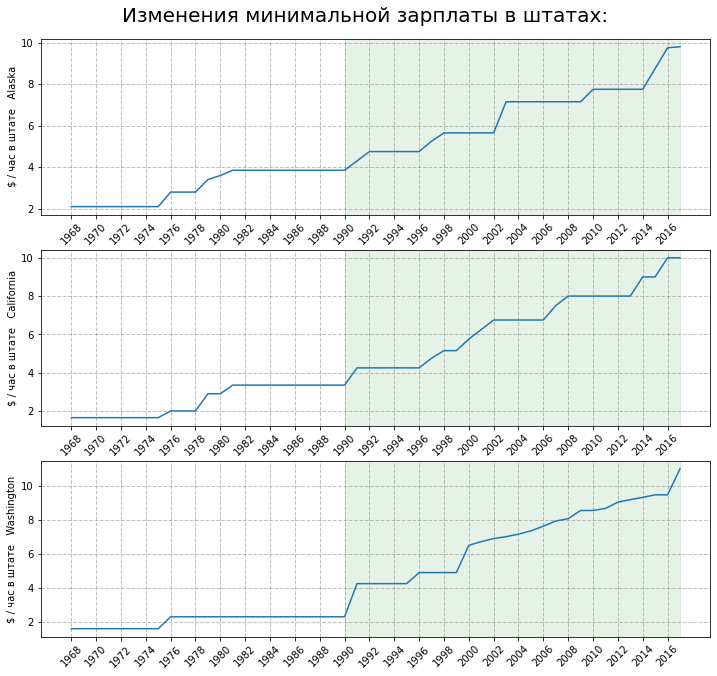

In [123]:
years = df['Year'].drop_duplicates()
# bins_max = bins.max()
bins = list(years[::2])
# bins.append(bins_max)

fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(12,11))

for i, state in enumerate(['Alaska', 'California', 'Washington']):
  data = df[df['State'] == state][['Year', 'Salary']]
  axs[i].plot(data['Year'], data['Salary'])
  # axs[i].set_xlabel(state)
  axs[i].set_ylabel('$ / час в штате   ' + state)
  axs[i].set_xticks(bins)
  axs[i].set_xticklabels(bins, rotation=45)
  axs[i].axvspan(xmin=1990, xmax=max(years), color='green', alpha=0.1)
  axs[i].grid(color='gray', linewidth=1, alpha=0.5, linestyle='--')
  # for bin in bins:
  #   axs[i].axvline(x=bin, color='lightgray', linewidth=1, linestyle='--')

fig.suptitle('Изменения минимальной зарплаты в штатах:', y=0.92, size=20)
plt.show()